(Click on the below links to navigate to different sections of the notebook)
# **Overview**  
- <a href="#1"> 1. Importing Data</a>
- <a href="#2"> 2. Preprocessing the Dataset</a>
- <a href="#3"> 3. Explanatory Data Analysis </a>
- <a href="#4"> 4. Divide the data into training and testing data </a>
- <a href="#5"> 5. Model</a>


In [454]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## <a id="1"> 1. Importing Data </a>

In [455]:
df2 = pd.read_csv('train.tsv',sep='\t',encoding= 'utf-8')
test = pd.read_csv('test.tsv',sep='\t',encoding= 'utf-8')

Y_test = test['Price']
test=test.drop(['Price'], axis=1)
# X_test = test

In [456]:
# df2 = pd.read_csv('OLX_Car_Data_CSV.csv',encoding= 'latin1')
df2 = df2.sample(frac=1).reset_index(drop=True)# shuffle
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 14896 rows and 9 columns


In [457]:
display(df2.head(5))
df2.columns

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Daihatsu,Used,Petrol,70000.0,Mira,1025000,Karachi,Cash,2013.0
1,Honda,Used,Petrol,1230000.0,Civic Prosmetic,590000,Karachi,Cash,2001.0
2,Suzuki,Used,Petrol,63000.0,Cultus VXR,780000,Karachi,Cash,2012.0
3,Suzuki,Used,Petrol,200000.0,Alto,415000,Lahore,Cash,2008.0
4,Toyota,Used,CNG,135000.0,Corolla GLI,1210000,Karachi,Cash,2010.0


Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Registered City', 'Transaction Type', 'Year'],
      dtype='object')

## <a id="2" > 2. Preprocessing the Dataset</a>

### <a id="2-1" > 2.1 Check for NULLS</a>

In [458]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))
print("------"*10)
print("Number of Null values in test dataset\n")
print(test.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                299
Condition            298
Fuel                 493
KMs Driven           381
Model                494
Price                  0
Registered City     1884
Transaction Type     493
Year                 380
dtype: int64
------------------------------------------------------------
Number of Null values in test dataset

Brand               135
Condition           135
Fuel                206
KMs Driven          165
Model               208
Registered City     856
Transaction Type    206
Year                164
dtype: int64


There are too many missing values in the dataset. So instead of removing them <br>we will fill it median, average or most frequent
data.<br>
We will consider "NaN" as some data point. So let's replace it with word "unknown" <br>to treat it as a categorical 
value in its respective columns.

**Replacing "NaN" with "unknown" to treat it as a categorical values in their respective columns**

In [459]:
#Train dataset
df2['Brand'].fillna(value='unknown', inplace=True)
df2['Condition'].fillna(value='unknown', inplace=True)
df2['Fuel'].fillna(value='unknown', inplace=True)
df2['Model'].fillna(value='unknown', inplace=True)
df2['Registered City'].fillna(value='unknown', inplace=True)
df2['Transaction Type'].fillna(value='unknown', inplace=True)

In [460]:
#Test dataset
test['Brand'].fillna(value='unknown', inplace=True)
test['Condition'].fillna(value='unknown', inplace=True)
test['Fuel'].fillna(value='unknown', inplace=True)
test['Model'].fillna(value='unknown', inplace=True)
test['Registered City'].fillna(value='unknown', inplace=True)
test['Transaction Type'].fillna(value='unknown', inplace=True)

In [461]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))
print("------"*10)
print("Number of Null values in test dataset\n")
print(test.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                 0
Condition             0
Fuel                  0
KMs Driven          381
Model                 0
Price                 0
Registered City       0
Transaction Type      0
Year                380
dtype: int64
------------------------------------------------------------
Number of Null values in test dataset

Brand                 0
Condition             0
Fuel                  0
KMs Driven          165
Model                 0
Registered City       0
Transaction Type      0
Year                164
dtype: int64


Let's now fill the missing values in the column "KMs Driven" with average values.

#### Filling the missing data

In [462]:
#Train dataset
df2['KMs Driven'].fillna((df2['KMs Driven'].mean()),inplace = True) #average data 
# df2['Year'].fillna(df2['Year'].value_counts().index[0],inplace = True) #most frequent data

In [463]:
#Test dataset
test['KMs Driven'].fillna((df2['KMs Driven'].mean()),inplace = True) #average data 
# df2['Year'].fillna(df2['Year'].value_counts().index[0],inplace = True) #most frequent data

In [464]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))
print("-----"*10)
print("Number of Null values in test dataset\n")
print(test.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                 0
Condition             0
Fuel                  0
KMs Driven            0
Model                 0
Price                 0
Registered City       0
Transaction Type      0
Year                380
dtype: int64
--------------------------------------------------
Number of Null values in test dataset

Brand                 0
Condition             0
Fuel                  0
KMs Driven            0
Model                 0
Registered City       0
Transaction Type      0
Year                164
dtype: int64


In [465]:
df2=df2.dropna() #drop rows with atleast a column with missing values
test=test.dropna() #drop rows with atleast a column with missing values

In [466]:
print("Train : ", df2.shape)
print("Test : ", test.shape)

Train :  (14516, 9)
Test :  (6139, 8)


### <a id="2-2" > 2.2 Check the datatype of columns</a>

In [467]:
df2.dtypes

Brand                object
Condition            object
Fuel                 object
KMs Driven          float64
Model                object
Price                 int64
Registered City      object
Transaction Type     object
Year                float64
dtype: object

In [468]:
#Train dataset
df2.describe()

,KMs Driven,Price,Year
count,1.451600e+04,1.451600e+04,14516.000000
mean,1.288415e+05,9.273380e+05,2005.833770
std,5.962916e+05,1.581559e+06,9.576848
min,1.000000e+00,5.000000e+04,1943.000000
25%,1.700000e+04,3.800000e+05,2002.000000
50%,6.700000e+04,6.600000e+05,2008.000000
75%,1.000000e+05,1.150000e+06,2013.000000
max,1.000000e+07,8.765432e+07,2020.000000


In [469]:
#Test dataset
test.describe()

,KMs Driven,Year
count,6.139000e+03,6139.000000
mean,1.359618e+05,2005.788076
std,6.543888e+05,9.650619
min,1.000000e+00,1915.000000
25%,1.553600e+04,2002.000000
50%,6.528500e+04,2008.000000
75%,1.000000e+05,2013.000000
max,1.000000e+07,2018.000000


### <a id="2-3" > 2.3 Remove Outliers</a>

#### Distribution of "Price" in train dataset

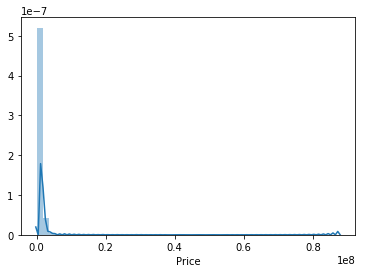

In [470]:
sns.distplot(df2["Price"])

#### Distribution of "KMs Driven" in train dataset

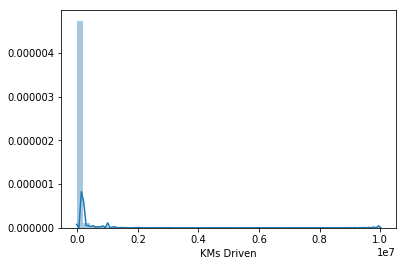

In [471]:
sns.distplot(df2["KMs Driven"])

#### Distribution of "KMs Driven" in test dataset

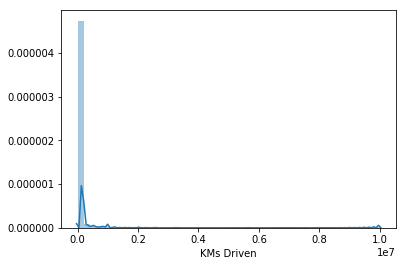

In [472]:
sns.distplot(test["KMs Driven"])

#### Distribution of "Year" in train dataset

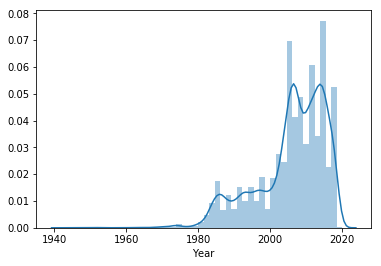

In [473]:
sns.distplot(df2["Year"])

#### Distribution of "Year" in test dataset

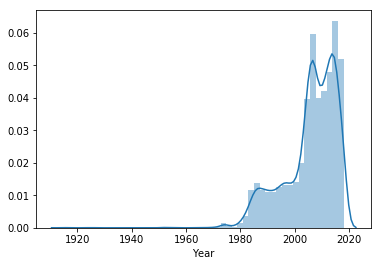

In [474]:
sns.distplot(test["Year"])

Determine outliers in dataset

In [475]:
cols=['Price']


for i in cols:
    quartile_1,quartile_3 = np.percentile(df2[i],[25,75])
    quartile_f,quartile_l = np.percentile(df2[i],[1,99])
    IQR = quartile_3-quartile_1
    lower_bound = quartile_1 - (1.5*IQR)
    upper_bound = quartile_3 + (1.5*IQR)
    print(i,lower_bound,upper_bound,quartile_f,quartile_l)

    df2[i].loc[df2[i] < lower_bound] = quartile_f
    df2[i].loc[df2[i] > upper_bound] = quartile_l


Price -775000.0 2305000.0 95000.0 4600000.0


In [476]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df2=remove_outlier(df2, 'Price')
# df2=remove_outlier(df2, 'KMs Driven')
# df2=remove_outlier(df2, 'Year')

#### After removing outlier in 'Price'

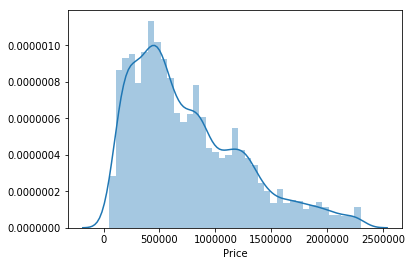

In [477]:
sns.distplot(df2["Price"])

#### After removing outlier in 'KMs Driven'

In [478]:
# sns.distplot(df2["KMs Driven"])

#### After removing outlier in 'Year'

In [479]:
# sns.distplot(df2["Year"])

## <a id="3">3. Explanatory Data Analysis </a>

### <a id="3-1" > 3.1 Distribution of "KMs Driven", "Price", "Year" in train dataset<a>

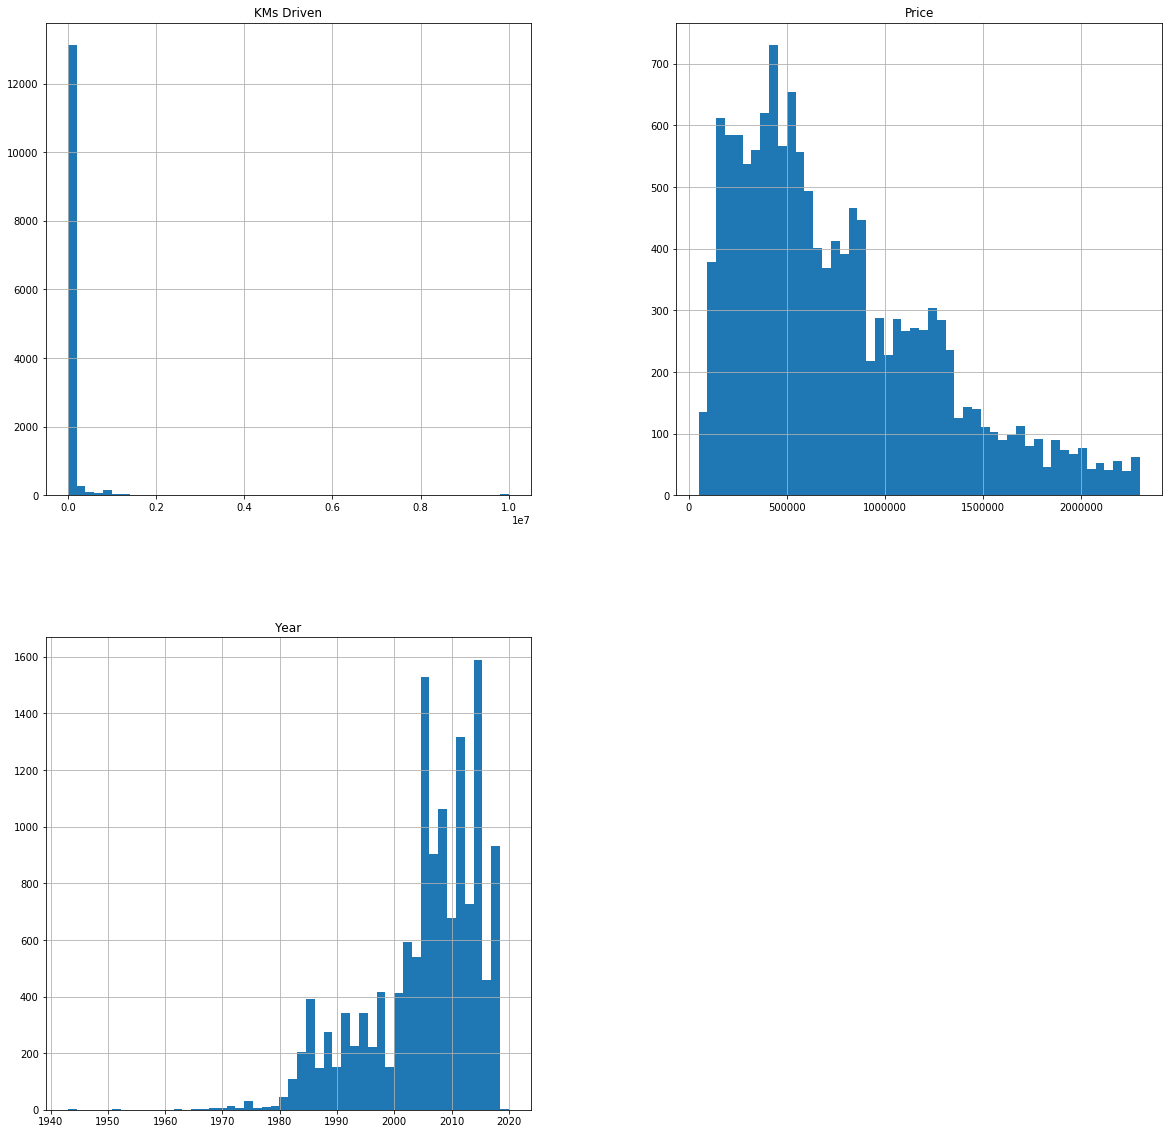

In [480]:
#Train Dataset
df2.hist(bins = 50 , figsize = (20,20))
plt.show()

Distribution of "KMs Driven", "Year" in test dataset

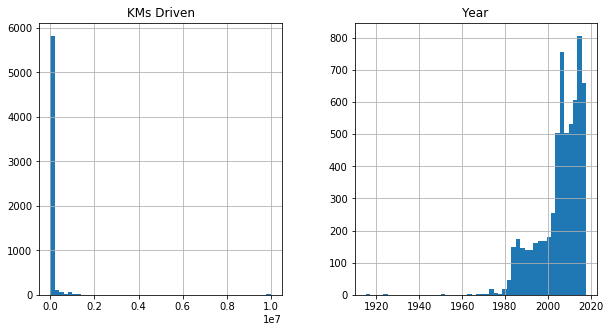

In [481]:
#Test Dataset
test.hist(bins = 50 , figsize = (10,5))
plt.show()

### <a id="3-2" > 3.2 Pairplot of different features with "Price"</a>

Pairplot to visualize the realtionship between the target and independent features

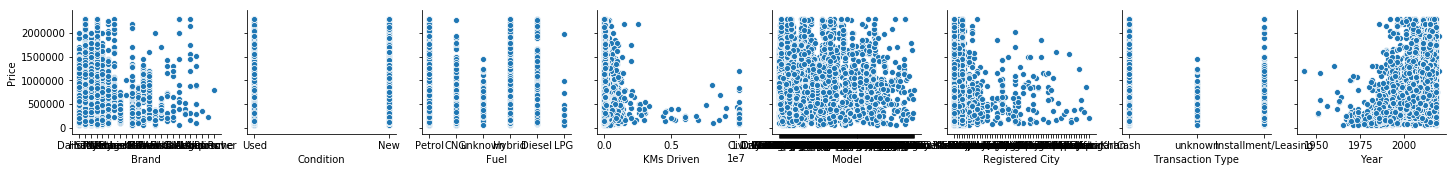

In [482]:

sns.pairplot(df2, x_vars=['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model',
       'Registered City', 'Transaction Type', 'Year'], y_vars=["Price"],aspect=1);


It can be observed that there is some linear relationship (rougly) between dependent variable "Price"
and independent variables "Brand", "KMs Driven", "Registered City" and "Year" .

So let's draw these plots separately for clear view.

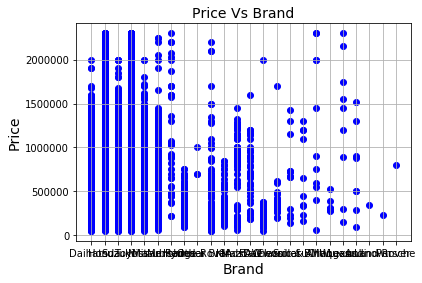

In [483]:
plt.scatter(df2['Brand'], df2['Price'], color='blue')
plt.title('Price Vs Brand', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

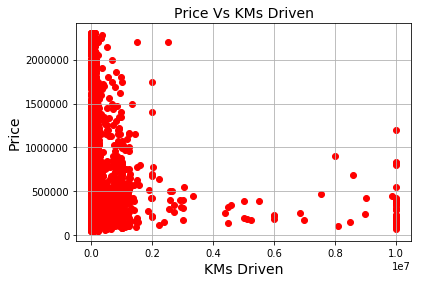

In [484]:
plt.scatter(df2['KMs Driven'], df2['Price'], color='red')
plt.title('Price Vs KMs Driven', fontsize=14)
plt.xlabel('KMs Driven', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

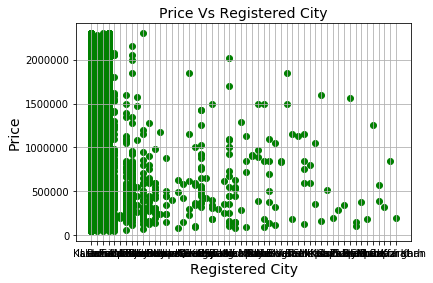

In [485]:
plt.scatter(df2['Registered City'], df2['Price'], color='green')
plt.title('Price Vs Registered City', fontsize=14)
plt.xlabel('Registered City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

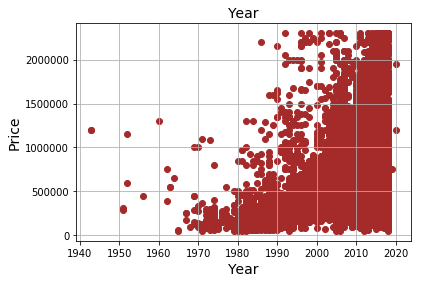

In [486]:
plt.scatter(df2['Year'], df2['Price'], color='brown')
plt.title('Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [487]:
test.shape

(6139, 8)

### <a id="3-2" > 3.2 Encoding the categorical data (one hot Encoding)</a>

In [488]:
# df2=df2.drop(['Transaction Type','Registered City'], axis=1)
# test=test.drop(['Transaction Type','Registered City'], axis=1)

In [489]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head()
df3.columns

Index(['KMs Driven', 'Price', 'Year', 'Brand_BMW', 'Brand_Changan',
       'Brand_Chevrolet', 'Brand_Classic & Antiques', 'Brand_Daewoo',
       'Brand_Daihatsu', 'Brand_FAW',
       ...
       'Registered City_Sargodha', 'Registered City_Sialkot',
       'Registered City_Sukkar', 'Registered City_Sukkur',
       'Registered City_Swabi', 'Registered City_Tank',
       'Registered City_Vehari', 'Registered City_unknown',
       'Transaction Type_Installment/Leasing', 'Transaction Type_unknown'],
      dtype='object', length=357)

In [490]:
X_test=pd.get_dummies(test,drop_first=True)
X_test.columns

Index(['KMs Driven', 'Year', 'Brand_BMW', 'Brand_Changan', 'Brand_Chevrolet',
       'Brand_Classic & Antiques', 'Brand_Daewoo', 'Brand_Daihatsu',
       'Brand_FAW', 'Brand_Honda',
       ...
       'Registered City_Sargodha', 'Registered City_Sheikhüpura',
       'Registered City_Sialkot', 'Registered City_Sukkar',
       'Registered City_Sukkur', 'Registered City_Vehari',
       'Registered City_Wah', 'Registered City_unknown',
       'Transaction Type_Installment/Leasing', 'Transaction Type_unknown'],
      dtype='object', length=304)

## <a id="4"> 4.  Divide the data into training and validation data </a>

In [491]:
df_y = df3['Price'].values
df_X = df3.drop(['Price'], axis=1)


In [492]:
test_size = 0.30

#Split into train and validation
X_train, X_val, Y_train, Y_val = train_test_split(df_X,df_y, test_size=test_size,shuffle=True, random_state = 3)


## <a id="5"> 5. Model</a>

## Random forest Regressor

In [493]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

### Grid searching of hyperparameters

In [494]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.3s finished


In [495]:
print(gs.best_score_)
print(gs.best_params_)
 

0.823169910993636
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [496]:
bp = gs.best_params_
rf_regressor = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
rf_regressor.fit(X_train, Y_train)

print("Train R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_train, Y_train))


Train R^2 Score:
Score: 0.88


### K Fold cross validation

Now we will do cross validation . This is because we split dataset in train and test. It may happen that test and train does not have uniform distribution of samples. So to make sure our model doesn't overfit i.e to generalize it we will do cross validation.

In [497]:
#Predicting the Price using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X_train, Y_train, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(Y_train, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: %.2f '% accuracy_rf)

Cross-Predicted(KFold) Random Forest Regression Accuracy: 0.84 


In [498]:
print("Validation R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_val, Y_val))

Validation R^2 Score:
Score: 0.85


In [499]:
# print("Test R^2 Score:")
# print('Score: %.2f' % rf_regressor.score(X_test, Y_test))

Let's find what features are most important

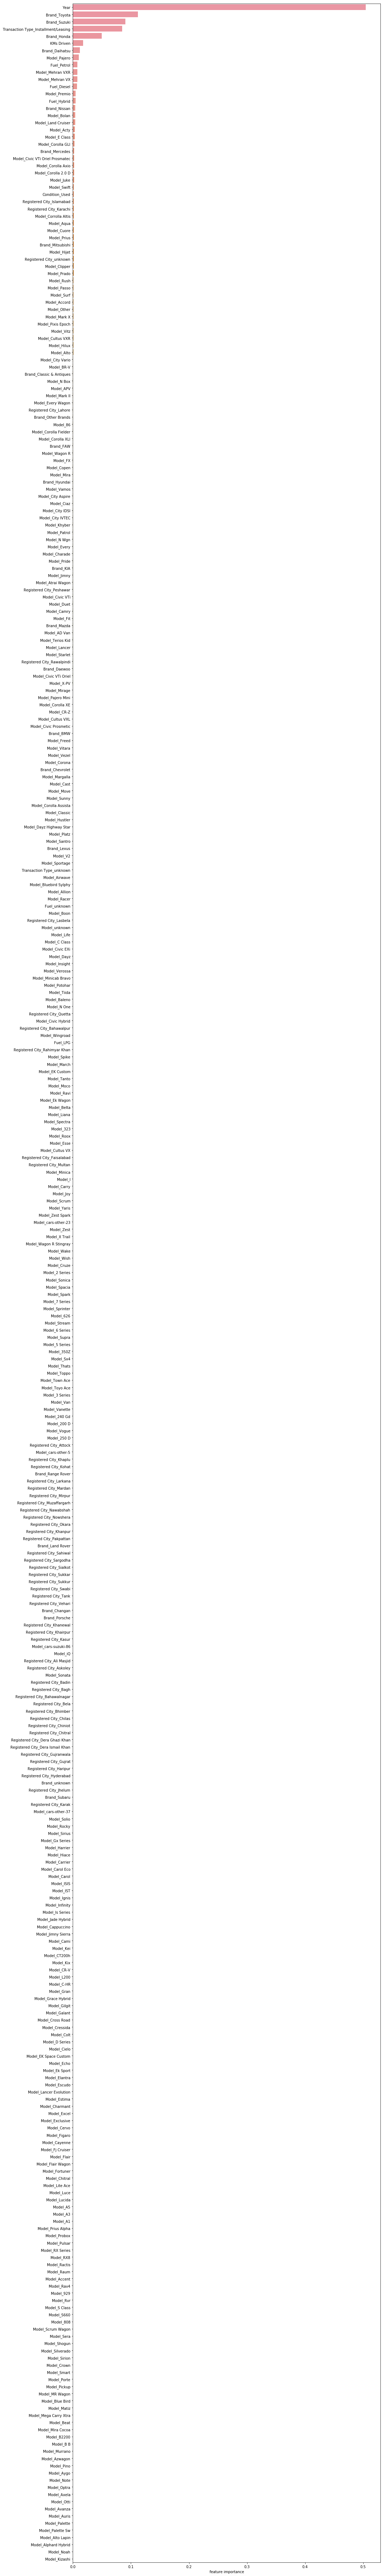

In [500]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

I am going to keep 30 most dominant features

In [501]:

# X_train = X_train.iloc[:,ranking[:50]]
# X_test = X_test.iloc[:,ranking[:50]]


### Correlation Matrix

In [502]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(14,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white', annot=True)

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into our learning model because this means that there isn't much redundant or superfluous data in our training set. Here are two most correlated features are that of "Brand_Toyata" and "Model_Corolla_GLI".

Let's run the Linear Regression to check if removing the less dominant features improved the model from earlier version.

## Linear Regression

In [503]:
regr = LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [504]:
print('Train R^2 \nscore: %.2f' % regr.score(X_train, Y_train))

Train R^2 
score: 0.82


In [505]:
print('Validation R^2 \nscore: %.2f' % regr.score(X_val, Y_val))


Validation R^2 
score: 0.80


In [506]:
# The mean squared error
y_pred =regr.predict(X_train)
print("Mean squared error (training): %.2f"
      % mean_squared_error(Y_train, y_pred))


Mean squared error (training): 45153895096.20


#### K-Fold Cross Validation

In [507]:
#Predicting the Price using cross validation (KFold method)
y_pred_kf = cross_val_predict(regr, X_train, Y_train, cv=10 )

#Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(Y_train, y_pred_kf)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: %.2f' % accuracy_lf)


Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: 0.79


In [508]:

print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)


 

Intercept: 
 -52737386.3949937
Coefficients: 
 [-5.14801510e-03  2.69969466e+04 -5.57834931e+03 -7.39117133e+05
 -7.52402145e+05  8.11143377e+05  1.22334627e+05 -3.33880028e+05
 -5.89715730e+05 -3.23720441e+05 -5.10611942e+05 -4.23071943e+05
 -4.31521243e+05  7.76278094e+05 -3.07898230e+05 -3.35951194e+05
 -5.37643597e+05 -4.08613395e+05 -3.27330002e+05  1.43246130e+05
 -1.37638652e+05 -3.99047708e+05 -4.58250451e+05 -4.98532484e+04
 -3.95335339e+05 -5.55447370e+04  1.78959950e+05  6.81181982e+04
  4.07804802e+04  8.34352302e+04  8.53942154e+04 -2.93424580e+05
  3.21032039e+05 -9.54339129e+04 -1.42187670e-04 -2.50298691e+05
 -2.42368768e+05  4.49759147e+05  7.21193792e-04 -9.62224959e+04
 -2.77446373e+05  1.07007286e+06 -5.21509155e-04 -3.94723245e+05
 -9.46550722e+04 -2.14702922e+06 -2.92515761e-05 -4.72671016e+04
 -1.07689885e+05  4.18495246e+04 -2.32374149e+05 -1.40720946e+03
 -4.73462038e+05  1.03516877e+05  1.90303862e+05 -1.42034421e+05
 -3.20181523e+05 -2.39107416e+05  3.2539415

### Scatter Plot of Predicted Price Vs Actual Price

Text(0,0.5,'Predictions')

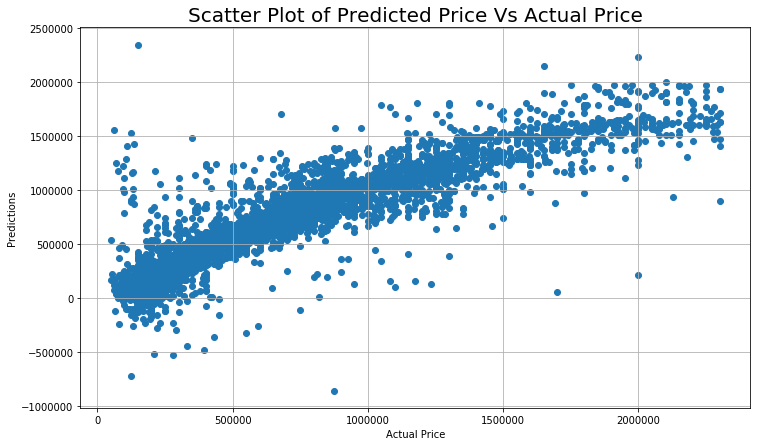

In [509]:
y_pred = regr.predict(X_val)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted Price Vs Actual Price', y=1, size=20)
plt.scatter(Y_val, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predictions")

### Residual Plot

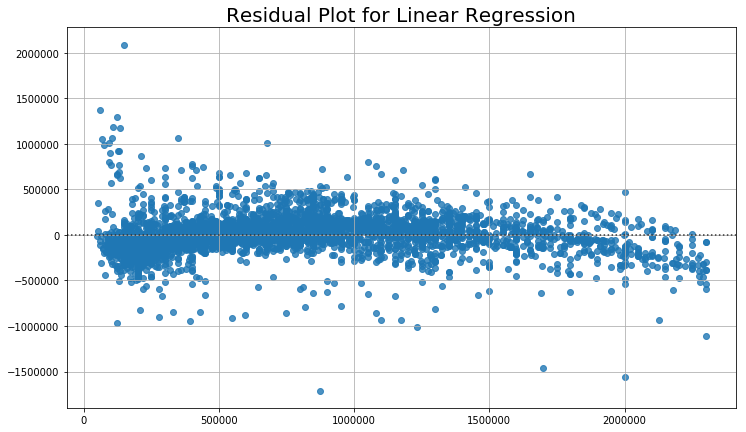

In [510]:
plt.figure(figsize=(12,7)) 
plt.grid(True)
plt.title('Residual Plot for Linear Regression', y=1, size=20) 
sns.residplot(Y_val,y_pred) # regression Residual Plot for linear regression model using bootstrapping

In [511]:
# print('Test R^2 \nscore: %.2f' % regr.score(X_test, Y_test))

**Train and Cross Validation accuracy is quite comparable. So we can say that our model in not overfitting. <br>It is generalizing better.**

In [515]:
# submission = rf_regressor.predict(X_test)
# filename = 'submission.csv'

# submission.to_csv(filename,sep='\t',index=False)

***